## Load the Data-files

In [ ]:
# Mount google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the Data-files
"""The data set have been provided as zip files and we have written a function to unzip the data here
to save space in drive in the helper_functions file. So we load the helper_functions file first and import the
required functions.It requires the file path and the destination name too (not underlined part of the code."""

## Importing the helper_functions file
!cp /content/drive/MyDrive/PCMALAI_UCBerkeley_Capstone/Notebooks/helper_functions.py helper_functions.py

## Import the required function(s) from the helper_functions file
from helper_functions import unzip_data

## Unzip data
unzip_data("/content/drive/MyDrive/PCMALAI_UCBerkeley_Capstone/data/ieee-fraud-detection.zip")
"""The above function would give 4 files: (train_transaction.csv and train_identity.csv) for train set and 
                                          (test_identity.csv and test_transaction.csv) for test set."""


'The above function would give 4 files: (train_transaction.csv and train_identity.csv) for train set and \n                                          (test_identity.csv and test_transaction.csv) for test set.'

In [ ]:
# Reading/Loading the data files (transaction and identity)
import pandas as pd
import numpy as np

train_identity = pd.read_csv("train_identity.csv") 

### Recap of dataset description of train_identity file

Identity Table

Variables in this table are identity information – network connection information (IP, ISP, Proxy, etc) and digital signature (UA/browser/os/version, etc) associated with transactions.

They're collected by Vesta’s fraud protection system and digital security partners. (The field names are masked and pairwise dictionary will not be provided for privacy protection and contract agreement)

Categorical Features:

DeviceType
DeviceInfo
id_12 - id_38

For more information about the dataset, please refer to notebook **1_Dataloading_and_train_transaction_EDA**

## EDA of **`train_identity`** file

### Basic EDA

In [ ]:
# Printing the train_identity df
train_identity.head(5)

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [ ]:
# Shape of the dataframe train_identity
train_identity.shape

(144233, 41)

In [ ]:
# Basic statistical description of the dataframe
train_identity.describe()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,1.442330e+05,144233.000000,140872.000000,66324.000000,66324.000000,136865.000000,136865.000000,5155.000000,5155.000000,74926.000000,...,139369.000000,45113.000000,139318.000000,139261.000000,5159.000000,5169.000000,4747.000000,5132.000000,5163.000000,77586.000000
mean,3.236329e+06,-10.170502,174716.584708,0.060189,-0.058938,1.615585,-6.698710,13.285354,-38.600388,0.091023,...,189.451377,14.237337,353.128174,403.882666,368.269820,16.002708,12.800927,329.608924,149.070308,26.508597
std,1.788496e+05,14.347949,159651.816856,0.598231,0.701015,5.249856,16.491104,11.384207,26.084899,0.983842,...,30.375360,1.561302,141.095343,152.160327,198.847038,6.897665,2.372447,97.461089,32.101995,3.737502
min,2.987004e+06,-100.000000,1.000000,-13.000000,-28.000000,-72.000000,-100.000000,-46.000000,-100.000000,-36.000000,...,100.000000,10.000000,100.000000,100.000000,100.000000,10.000000,11.000000,100.000000,100.000000,0.000000
25%,3.077142e+06,-10.000000,67992.000000,0.000000,0.000000,0.000000,-6.000000,5.000000,-48.000000,0.000000,...,166.000000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,3.198818e+06,-5.000000,125800.500000,0.000000,0.000000,0.000000,0.000000,14.000000,-34.000000,0.000000,...,166.000000,15.000000,341.000000,472.000000,252.000000,14.000000,11.000000,321.000000,149.000000,24.000000
75%,3.392923e+06,-5.000000,228749.000000,0.000000,0.000000,1.000000,0.000000,22.000000,-23.000000,0.000000,...,225.000000,15.000000,427.000000,533.000000,486.500000,14.000000,15.000000,371.000000,169.000000,32.000000
max,3.577534e+06,0.000000,999595.000000,10.000000,0.000000,52.000000,0.000000,61.000000,0.000000,25.000000,...,229.000000,29.000000,671.000000,661.000000,854.000000,44.000000,26.000000,548.000000,216.000000,32.000000


In [ ]:
# Information on the columns of train_transaction df
train_identity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233 non-null  object 
 13  id_13          127320 non-null  float64
 14  id_14          80044 non-null   float64
 15  id_15          140985 non-null  object 
 16  id_16          129340 non-null  object 
 17  id_17          139369 non-nul

In [ ]:
# Data type of the specific columns
train_identity.dtypes

TransactionID      int64
id_01            float64
id_02            float64
id_03            float64
id_04            float64
id_05            float64
id_06            float64
id_07            float64
id_08            float64
id_09            float64
id_10            float64
id_11            float64
id_12             object
id_13            float64
id_14            float64
id_15             object
id_16             object
id_17            float64
id_18            float64
id_19            float64
id_20            float64
id_21            float64
id_22            float64
id_23             object
id_24            float64
id_25            float64
id_26            float64
id_27             object
id_28             object
id_29             object
id_30             object
id_31             object
id_32            float64
id_33             object
id_34             object
id_35             object
id_36             object
id_37             object
id_38             object
DeviceType        object


In [ ]:
# Percentage of Null values of each column the data frame
null_columns = train_identity.isna().sum()
#print(f"The dtype of null_columns is: '{null_columns.dtype()}'")
print(f"The columns with zero null values is: /n '{null_columns[null_columns==0]}'")
print(f"The number of columns with zero null values is: '{len(null_columns[null_columns==0])}' ")
print(f"The percentage of null values in the following column is : '{null_columns[null_columns>0]/train_identity.shape[0]}'")
print(f"The number of columns with non-zero null values is :'{len(null_columns[null_columns>0])}' ")
print(max(null_columns[null_columns>0]/train_identity.shape[0]))

The columns with zero null values is: /n 'TransactionID    0
id_01            0
id_12            0
dtype: int64'
The number of columns with zero null values is: '3' 
The percentage of null values in the following column is : 'id_02         0.023303
id_03         0.540161
id_04         0.540161
id_05         0.051084
id_06         0.051084
id_07         0.964259
id_08         0.964259
id_09         0.480521
id_10         0.480521
id_11         0.022568
id_13         0.117262
id_14         0.445037
id_15         0.022519
id_16         0.103257
id_17         0.033723
id_18         0.687221
id_19         0.034077
id_20         0.034472
id_21         0.964231
id_22         0.964162
id_23         0.964162
id_24         0.967088
id_25         0.964419
id_26         0.964204
id_27         0.964162
id_28         0.022568
id_29         0.022568
id_30         0.462224
id_31         0.027393
id_32         0.462079
id_33         0.491871
id_34         0.460560
id_35         0.022519
id_36         0

#### Summary of Basic EDA of `train_identity` data

This dataset `'train_identity'` has 144233 observations and 41 features. Apart from three columns, all other columns have null values in them and these null values were computed to be ranging from ~2 to almost 96%. 

Since this dataframe doesnot contain the traget variable we werenot able to determine the amount of correact and fraud transations in this dataset. However it could be found after merging this dataframe with the transaction dataset. SInce the objective of this task to conduct a preliminaray analysis to determine the features that could be used in the modeling after cleaning, we omit the step of performing the EDA after merging. 

Instead we perform the EDA, find the reduced number of features that are not corerelated with each other and then merge with the transaction data to conduct the data modeling steps. 




### Visual EDA

In [ ]:
# importing the libraries
import matplotlib.pyplot as plt
import seaborn as sns


The columns that have numerical features are: '['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_13', 'id_14', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_24', 'id_25', 'id_26', 'id_32']'
The number of numerical columns in this dataframe is:'24'


Text(0.5, 1.1, 'Figure - 5: Box plot of non-principal components numerical variables')

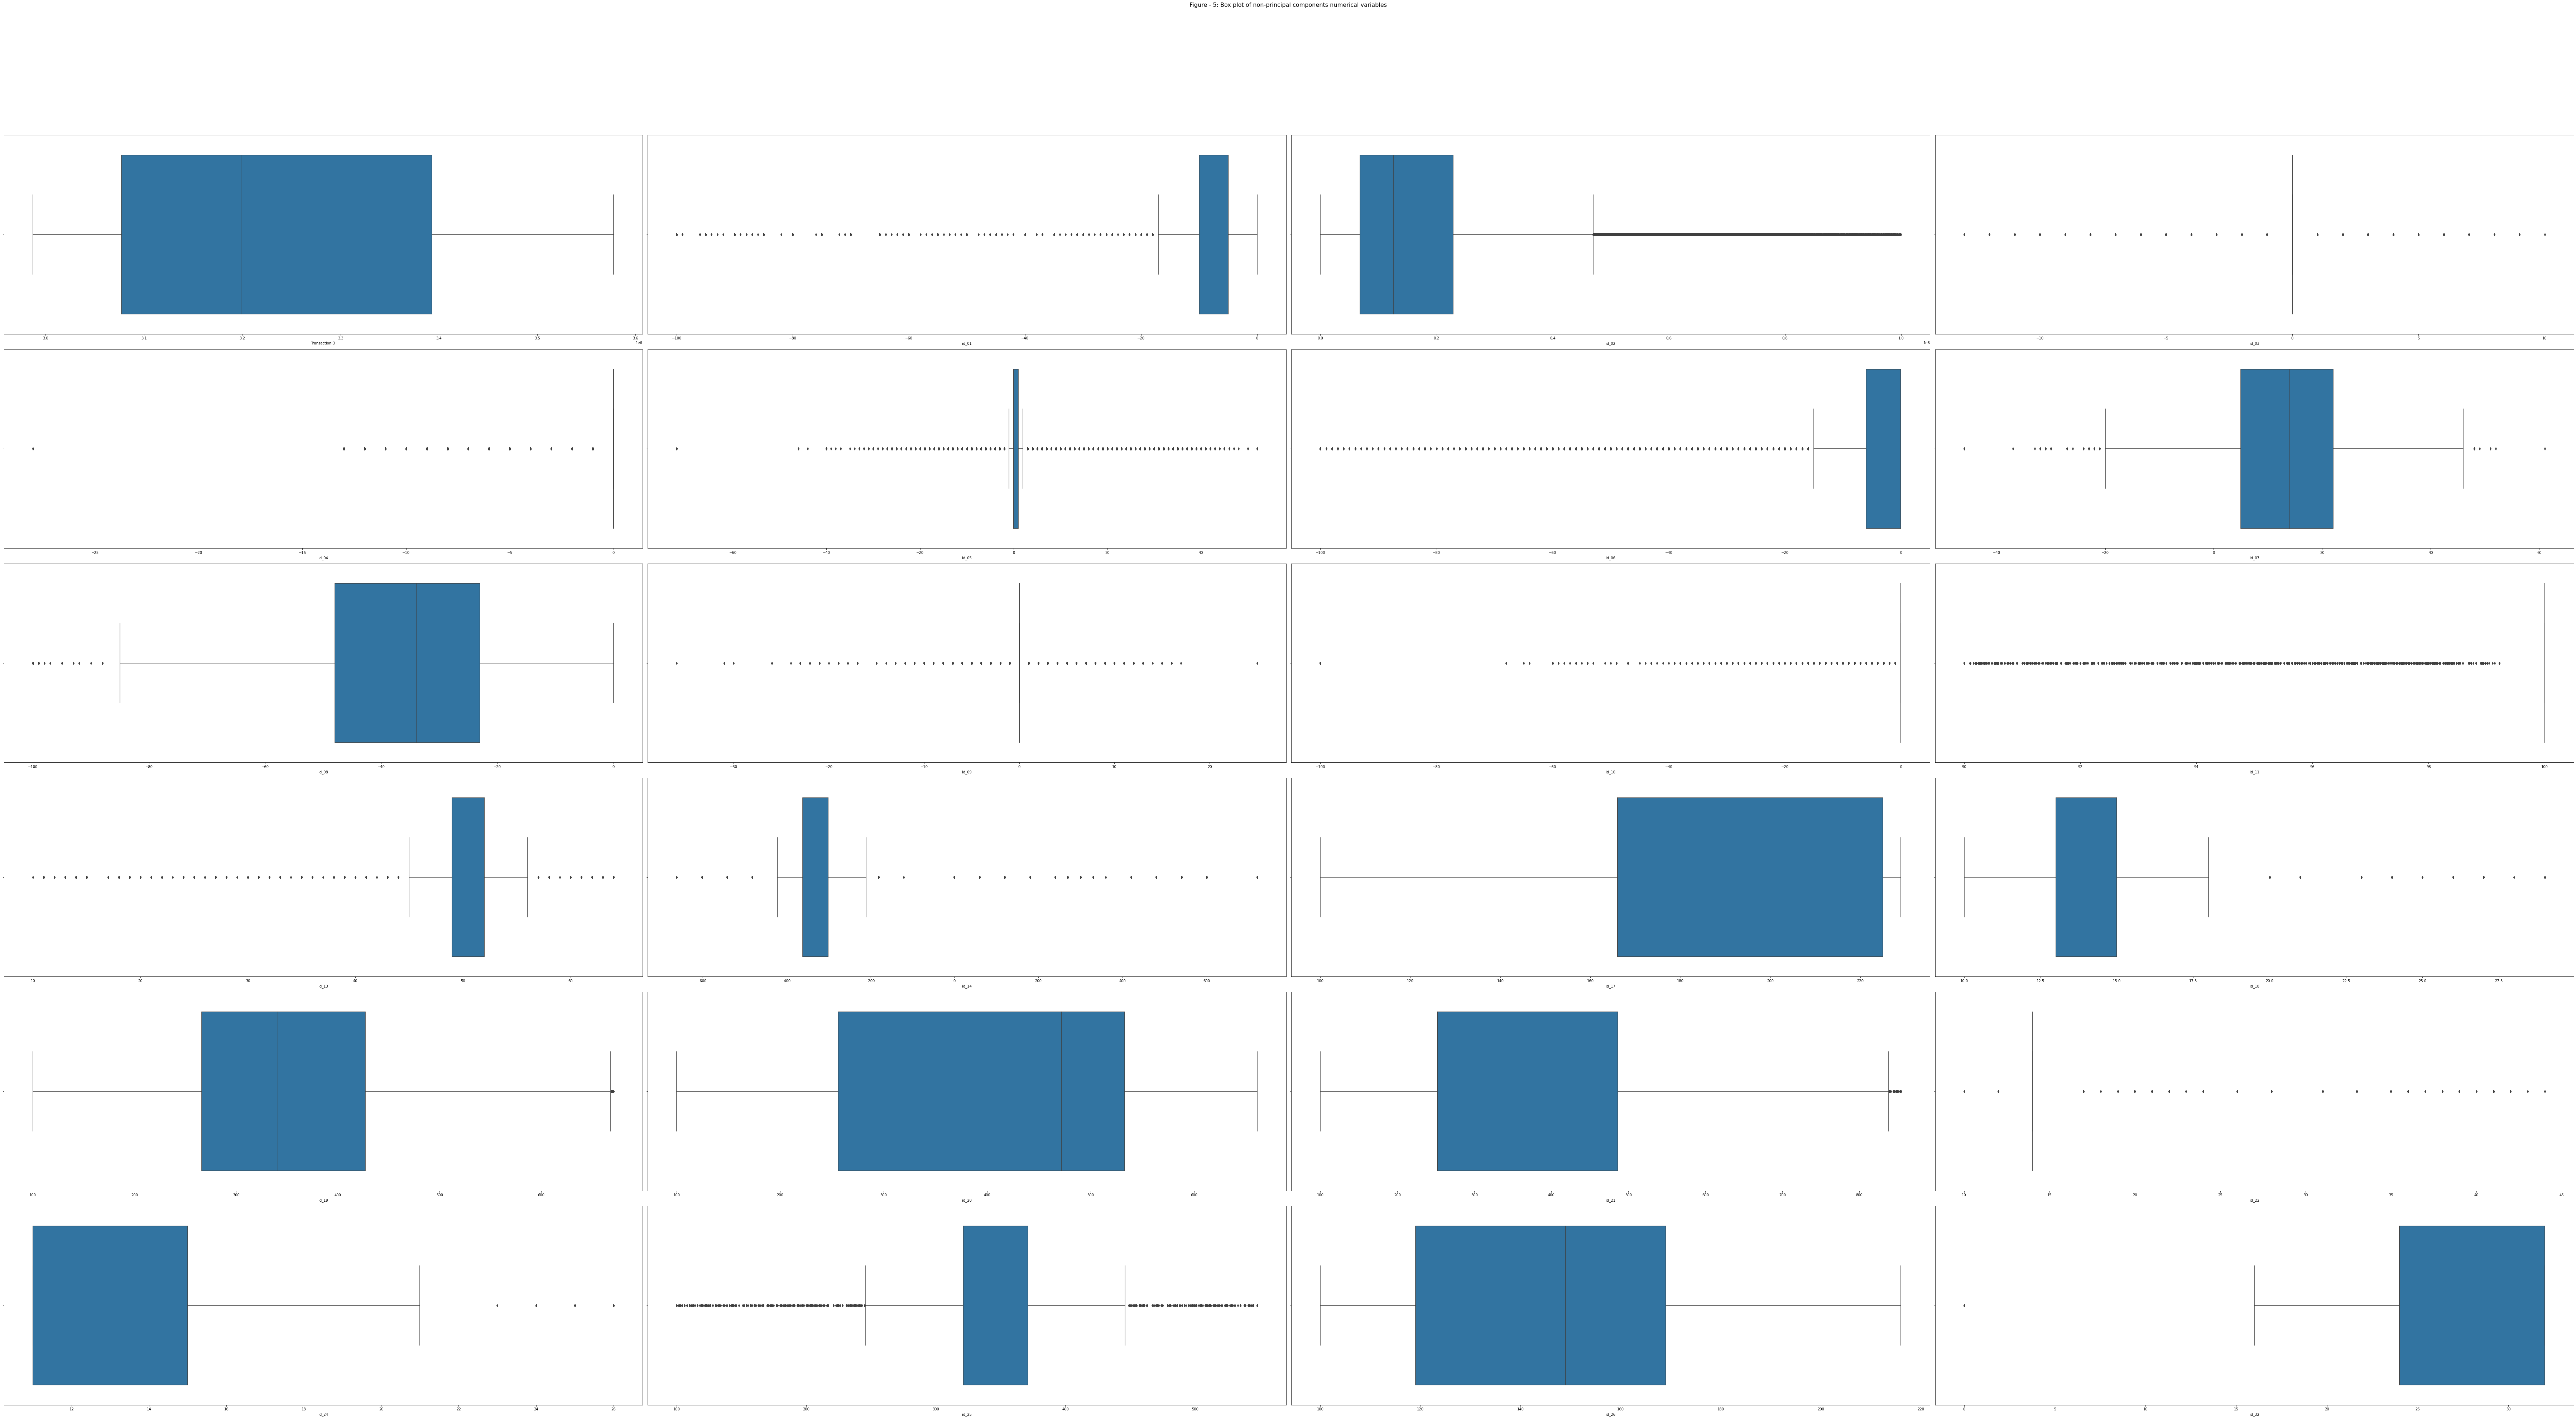

In [ ]:
# Box-plot of numerical features

num_column_lst = []
for icol in train_identity.columns:
  if train_identity[icol].dtypes in ['float64', 'int64']:
    num_column_lst.append(icol)
print(f"The columns that have numerical features are: '{num_column_lst}'")
print(f"The number of numerical columns in this dataframe is:'{len(num_column_lst)}'")

fig, axs = plt.subplots(nrows = 6, ncols=4, figsize = (100,50))
for name,ax in zip(num_column_lst,axs.flatten()):
  sns.boxplot(data=train_identity,x=name,ax=ax)
  # plt.show()
fig.tight_layout()
fig.suptitle('Fig-1: Box plot of non-principal components numerical variables of trian_identity dataset',y=1.1,fontsize=16)


In [ ]:
# Bar-Plots of the 14 categorical features(non-enriched features) to examine the distribution of the various categories in a feature
cat_column_lst = []
for icol in train_identity.columns:
  if train_identity[icol].dtypes in ['object']:
    cat_column_lst.append(icol)
print(cat_column_lst)
print(len(cat_column_lst))


['id_12', 'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']
17


The features id_30, id_31, id_33 and DeviceInfo have information pertaining to device/web browser etc and hence have a lot of unique observations. Due to this plotting them gives a illegible x-axis. 

{'id_35', 'DeviceType', 'id_37', 'id_12', 'id_34', 'id_38', 'id_36', 'id_16', 'id_23', 'id_28', 'id_27', 'id_29', 'id_15'}


Text(0.5, 1.02, 'Figure-6: Bar-plot of Categorical variables')

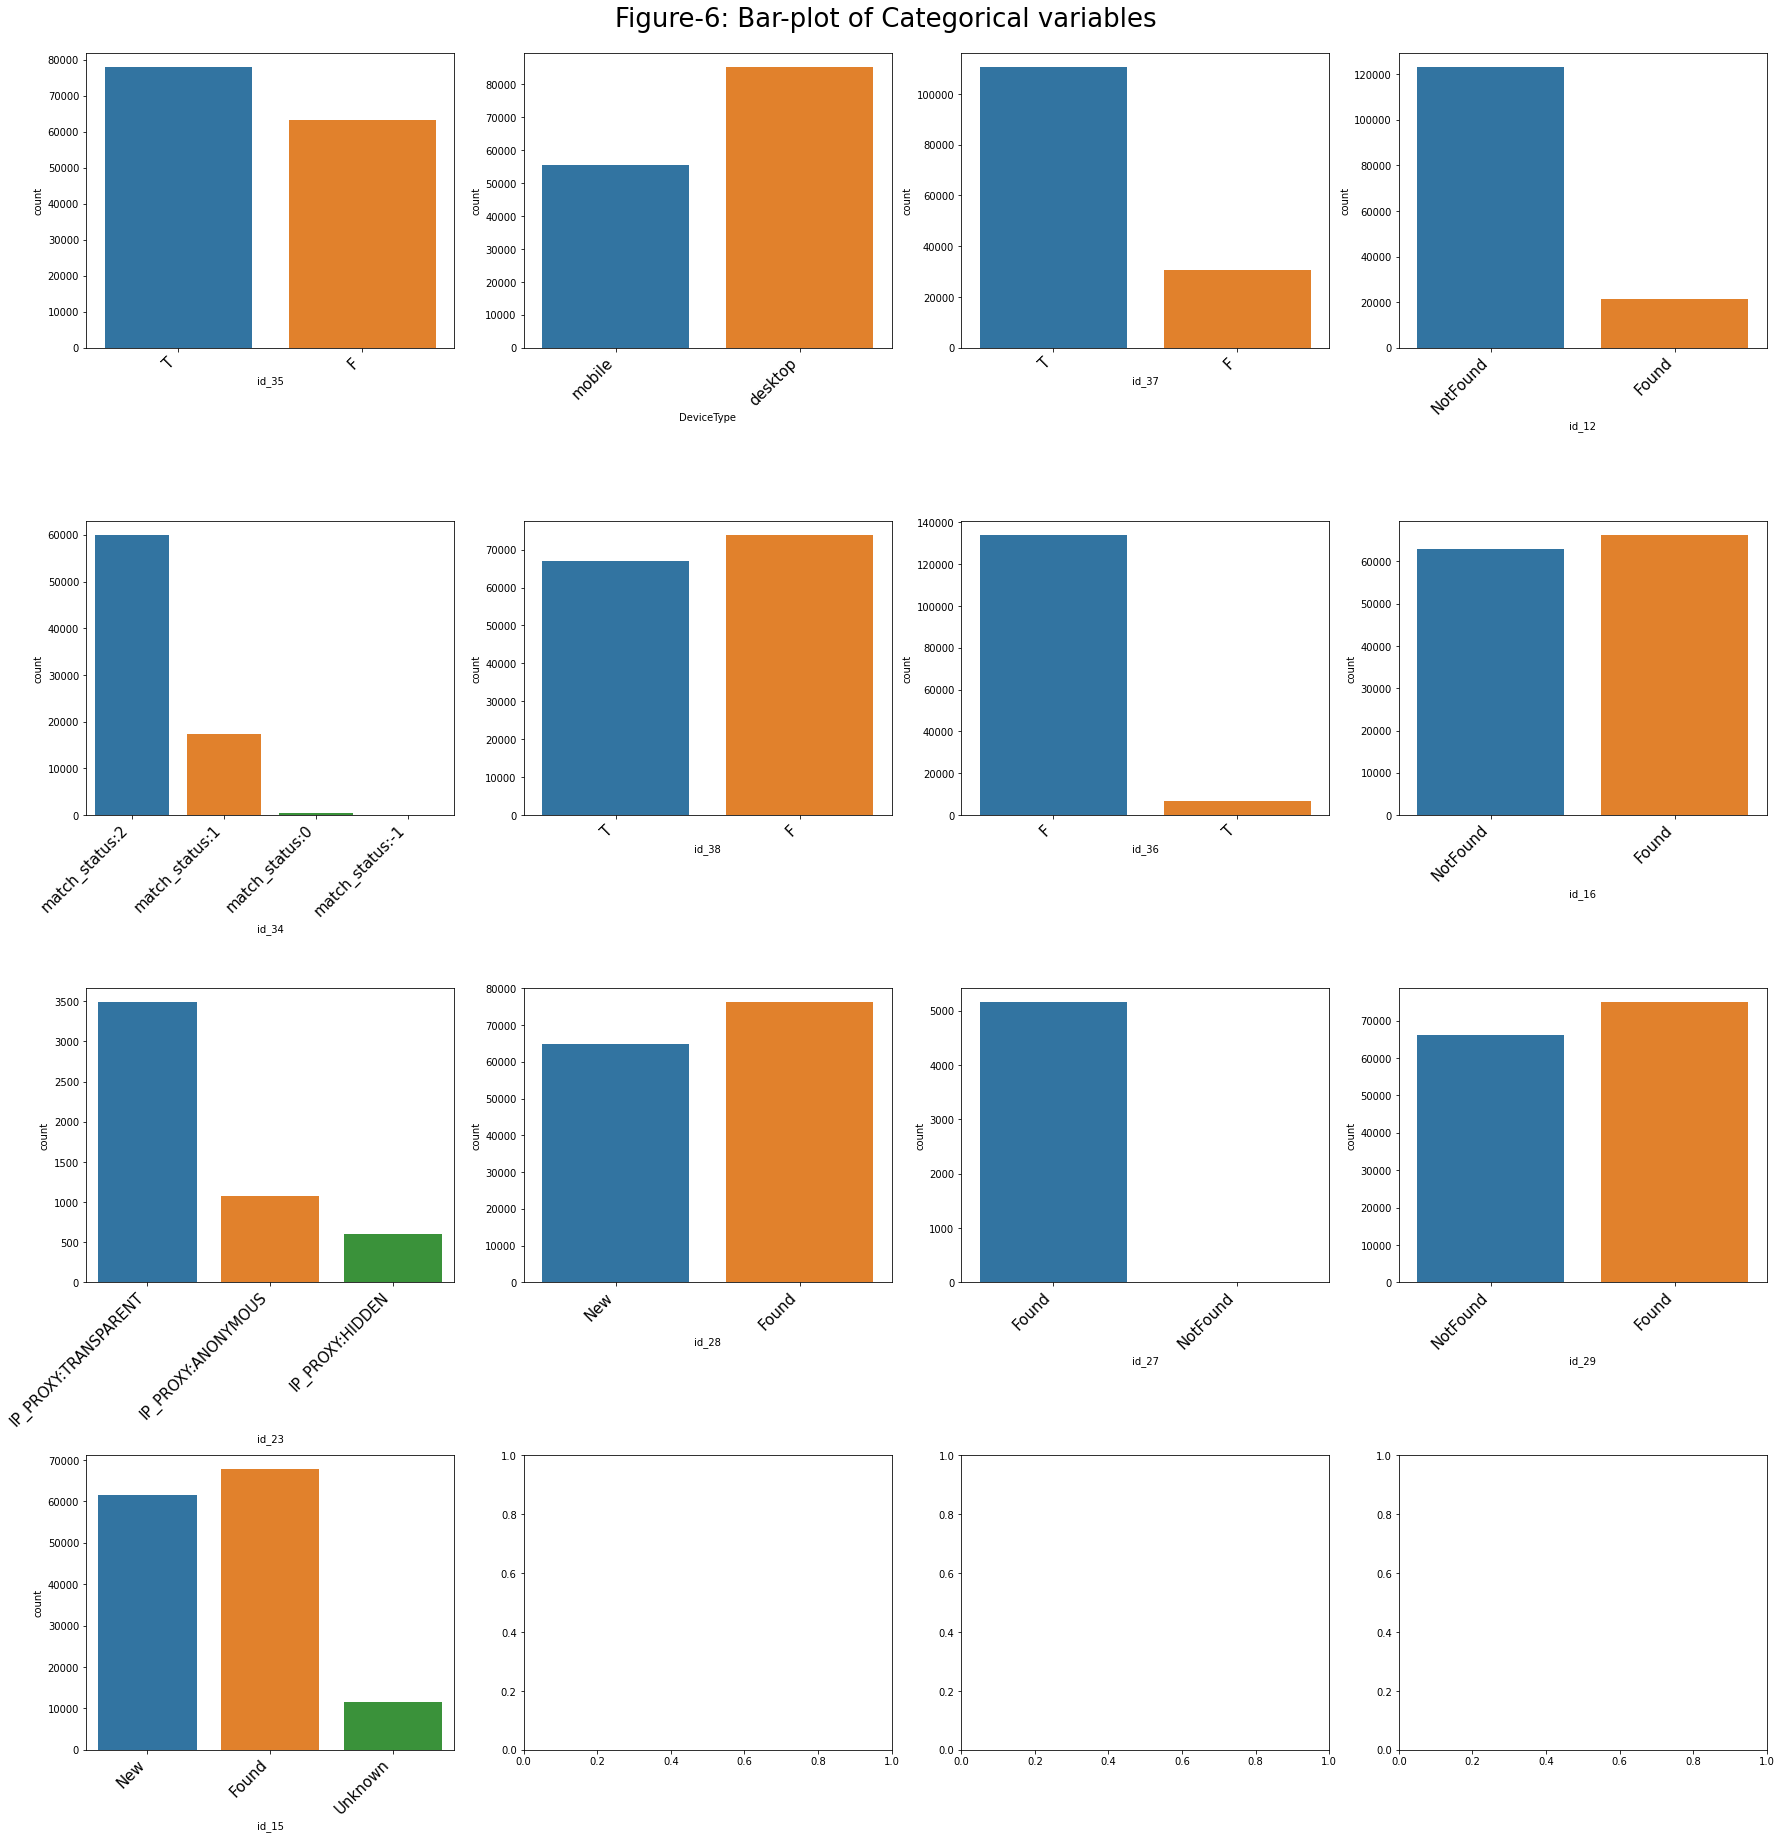

In [ ]:
"""Since the features id_30, id_31, id_33 and DeviceInfo may be having information pertaining to device/broswer/product, they have a lot of unique
values and plotting them gives less information and an illegible axis. Hence we omit these four features from the plot."""

cat_col_lst = (set(cat_column_lst) - set(['id_30', 'id_31', 'id_33', 'DeviceInfo']))
print(cat_col_lst)

fig, axs = plt.subplots(nrows = 4, ncols=4, figsize = (25,25))
for name,ax in zip(cat_col_lst,axs.flatten()):
  sns.countplot(data=train_identity,x=name,ax=ax)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=15)
  
fig.tight_layout()
fig.suptitle('Fig-2: Bar-plot of Categorical variables of the train_identity dataset',y=1.02,fontsize=26)

#### Summary of Visual EDA

We also examined the dataset using visualization techniques. The box plot of numerical columns (24 features) id20,id17,id26 were the only columns that did not have outliers. As we did in the notebook we would not be removing any outliers as we donot know if those outliers are represented by fraudeulent transactions or if they are just a part of the complexity of the dataset. In etither scenerios it wouldbe important for us to include them in out analysis to not lose the fraudulent observations that are already very less and to change the nature of the dataset we have. 

The bar plot of the categorical features (10 features), does not provide much infomartion apart from the hidden categories and the counts of obsrvations in those categories. The features id_30, id_31, id_33 and DeviceInfo have information pertaining to device/web browser etc and hence have a lot of unique observations. Due to this plotting them gives a illegible x-axis.





### EDA of **`id`** Columns (38 columns) 

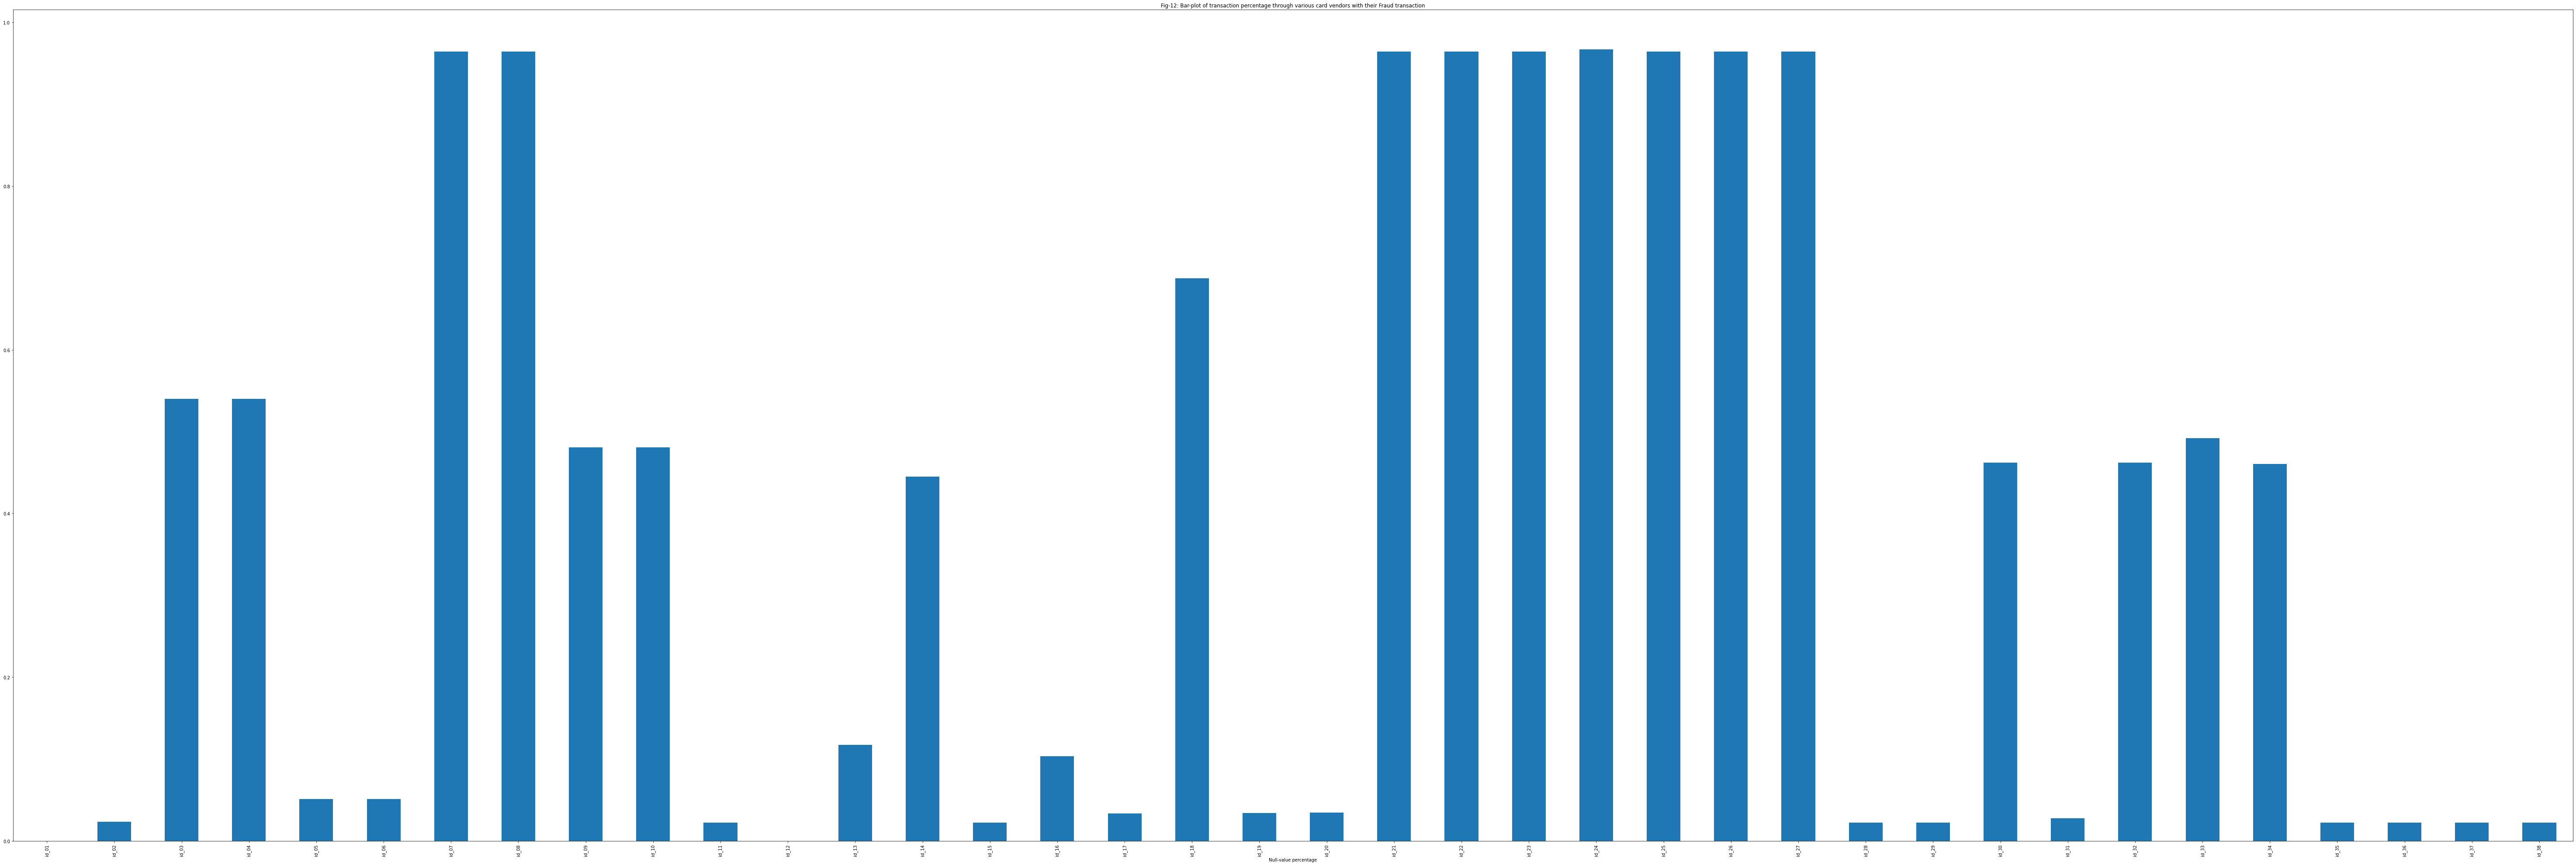

In [ ]:
# Bar chart of the id-columns based on the null values

null_columns_prcnt = train_identity.isna().sum()/train_identity.shape[0]
colsToPlot = ['id_' + str(i).zfill(2) for i in range(1,39)]
plt.figure(figsize=(105,35))
null_columns_prcnt[colsToPlot].plot(kind='bar')
plt.title("Fig-12: Bar-plot of transaction percentage through various card vendors with their Fraud transaction")
plt.xlabel('Null-value percentage')
plt.show()

We can split this data based on their NAN structure into three groups: less than 20% NaN, 40-80%, and more than 80%. 

Text(0.5, 1.1, 'Fig-13: Bar plot of the feature engineered columns separated by groups')

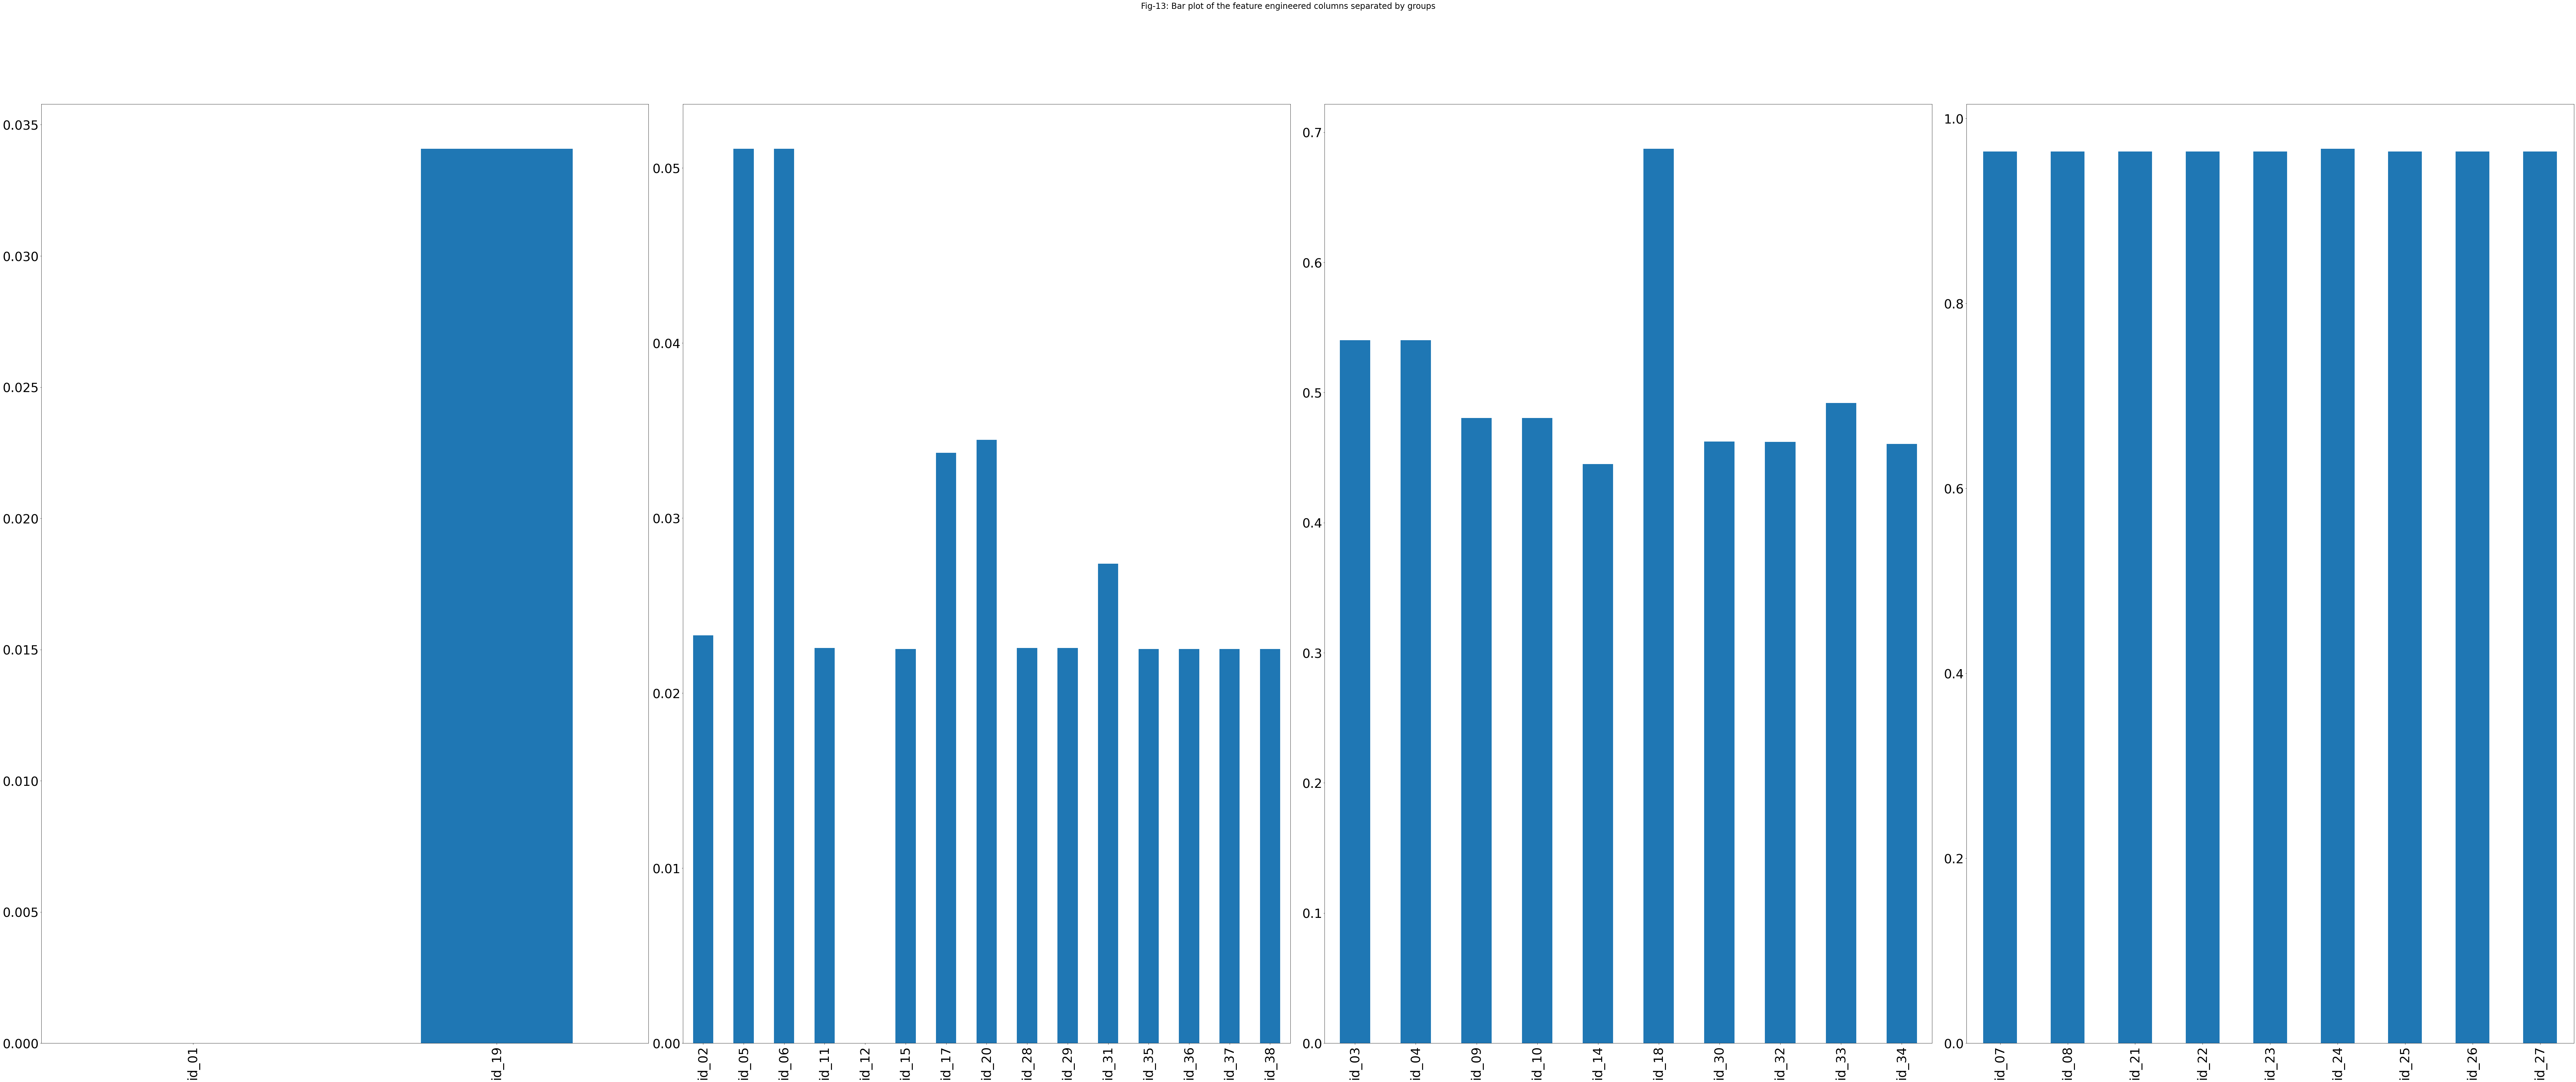

In [ ]:
# Creating a dictionary of the groups of id-columns to create subplots of the groups to visualize null values
# Grouping the id-columns based on their percentage of null values

id_group_dict = {'grp0':['id_01','id_19'],
                'grp20':['id_02','id_05','id_06','id_11','id_12','id_15','id_17','id_20','id_28',\
                         'id_29','id_31','id_35','id_36','id_37','id_38'],
                'grp40':['id_03','id_04','id_09','id_10','id_14','id_18','id_30','id_32','id_33','id_34'],
                'grp80':['id_07','id_08','id_21','id_22','id_23','id_24','id_25','id_26','id_27']
                }

fig, axs = plt.subplots(nrows = 1, ncols=4, figsize = (105,40))
for name,ax in zip(id_group_dict.keys(),axs.flatten()):
  null_columns_prcnt[id_group_dict[name]].plot(ax=ax,kind='bar')
  ax.tick_params(axis='both', which='major', labelsize=37)

fig.tight_layout()
fig.suptitle('Fig-13: Bar plot of the feature engineered columns separated by groups',y=1.1,fontsize=24)

In [ ]:
# correlation each id-columns within the group

## Helper functions
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(corrMatrix, corrThresh):
    au_corr = corrMatrix.abs().unstack()
    labels_to_drop = get_redundant_pairs(corrMatrix)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[au_corr>corrThresh]

def plotCorrMatrixAndGetColsToDrop(df,figsize,threshold,columnsToCorr):
  plt.figure(figsize=figsize)
  grp_correlationMatrix = df[columnsToCorr].corr()
  sns.heatmap(grp_correlationMatrix, cmap='RdBu_r', annot=True, center=0.0)

  #compute the columns to drop from a given list of columns
  high_corr_pairs = get_top_abs_correlations(grp_correlationMatrix, threshold)

  upper = grp_correlationMatrix.where(np.triu(np.ones(grp_correlationMatrix.shape), k=1).astype(np.bool))
  to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
  
  return high_corr_pairs,grp_correlationMatrix,to_drop


<ipython-input-43-9623c69035a5>:27: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = grp_correlationMatrix.where(np.triu(np.ones(grp_correlationMatrix.shape), k=1).astype(np.bool))


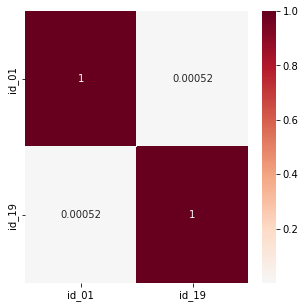

In [ ]:
## Correlation of grp0 with the target variable and within V columns
corrThresh = 0.65
grp0_high_corr_pairs,grp0_correlationMatrix,grp0_todrop = plotCorrMatrixAndGetColsToDrop(train_identity,(5,5),corrThresh,id_group_dict['grp0'])


<ipython-input-43-9623c69035a5>:27: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = grp_correlationMatrix.where(np.triu(np.ones(grp_correlationMatrix.shape), k=1).astype(np.bool))


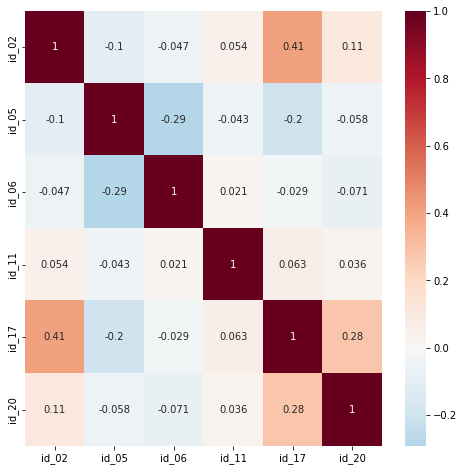

In [ ]:
## Correlation of grp with the target variable and within V columns
corrThresh = 0.65
grp20_high_corr_pairs,grp20_correlationMatrix,grp20_todrop = plotCorrMatrixAndGetColsToDrop(train_identity,(8,8),corrThresh,id_group_dict['grp20'])


<ipython-input-43-9623c69035a5>:27: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = grp_correlationMatrix.where(np.triu(np.ones(grp_correlationMatrix.shape), k=1).astype(np.bool))


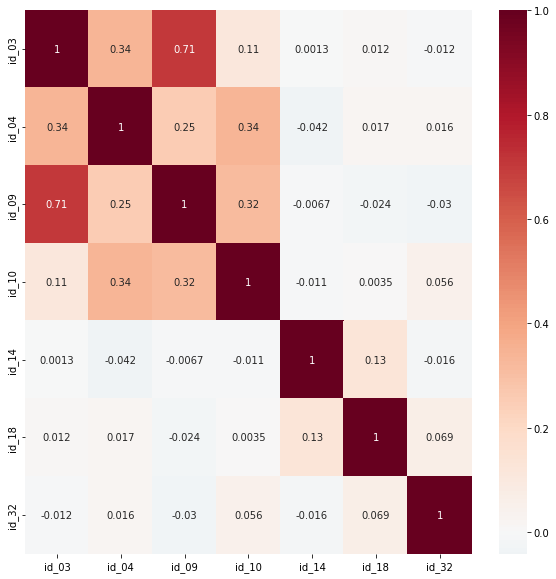

In [ ]:
## Correlation of grp40 with the target variable and within V columns
corrThresh = 0.65
grp40_high_corr_pairs, grp40_correlationMatrix, grp40_todrop = plotCorrMatrixAndGetColsToDrop(train_identity,(10,10), corrThresh, id_group_dict['grp40'])


In [ ]:
# extract the results from grp40
retain_cols = list(set(id_group_dict['grp40']) - set(grp40_todrop))
id_grp40_dict_results = {'Columns':id_group_dict['grp40'],
               'num columns':len(id_group_dict['grp40']),
               'Dropping Columns':grp40_todrop,
               'Num Columns Dropped':len(grp40_todrop),
               'Retain Columns':retain_cols,
               'Num Columns Retained': len(retain_cols)}
id_grp40_dict_results

{'Columns': ['id_03',
  'id_04',
  'id_09',
  'id_10',
  'id_14',
  'id_18',
  'id_30',
  'id_32',
  'id_33',
  'id_34'],
 'num columns': 10,
 'Dropping Columns': ['id_09'],
 'Num Columns Dropped': 1,
 'Retain Columns': ['id_32',
  'id_10',
  'id_18',
  'id_04',
  'id_34',
  'id_30',
  'id_33',
  'id_03',
  'id_14'],
 'Num Columns Retained': 9}

<ipython-input-43-9623c69035a5>:27: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = grp_correlationMatrix.where(np.triu(np.ones(grp_correlationMatrix.shape), k=1).astype(np.bool))


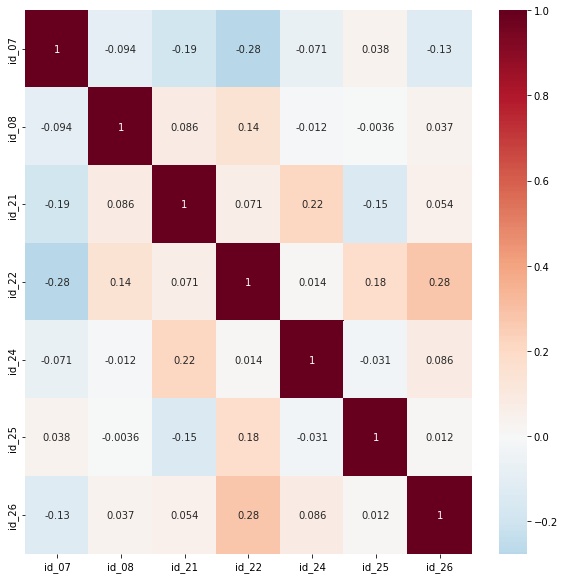

In [ ]:
## Correlation of grp80 with the target variable and within V columns
corrThresh = 0.65
grp80_high_corr_pairs,grp80_correlationMatrix,grp80_todrop = plotCorrMatrixAndGetColsToDrop(train_identity,(10,10),corrThresh,id_group_dict['grp80'])


#### Summary of the EDA of the `id1-38` columns

We subsetted the id features and analysed theri null values and foud 4 groups with similar null values structures. these four groups were further analysed with bar charts of any insights which did not yeild any further information that could help with our business task/objective. 

The null structure of the columns were used as a basis to subgroup these columns to find if these features were corerelates using heatmap. There was only one subgroup that exhibited correlation among features leading us to retain 9 columns out of 10 that were not correlated (corerelation coefficient <0.65). Hence out of the 40 features we have been able to retain 40 features due very less correlation among features in this dataset. 

## SELECTED FEATURES FROM THE TRAIN_IDENTITY DATAFRAME

In [ ]:
# Selecting and grouping all the retained features from the V, C, D and M columns

features_to_retain_identity = {'columns_to_retain':['TransactionID',	'id_01',	'id_02',	'id_03',	'id_04',	'id_05',\
                                            'id_06',	'id_07',	'id_08','id_10',	'id_11',	'id_12','id_13',\
                                           	'id_14',	'id_15','id_16',	'id_17',	'id_18',	'id_19','id_20',\
                                           	'id_21',	'id_22',	'id_23',	'id_24',	'id_25',	'id_26','id_27',\
                                           	'id_28',	'id_29',	'id_30',	'id_31',	'id_32',	'id_33','id_34',\
                                           	'id_35',	'id_36',	'id_37',	'id_38',	'DeviceType','DeviceInfo'
                                          ]
                              }
pd.DataFrame(features_to_retain_identity).to_csv('columns_to_retain_identity.csv')

In [ ]:
# copy and save the columns in the results i.e classification_products directory

!cp 'columns_to_retain_identity.csv' '/content/drive/MyDrive/PCMALAI_UCBerkeley_Capstone/Classification_products/columns_to_retain_identity.csv'

We have been able to find that the features werent correlated with one another unlike the transaction dataset and hence we have 40 columns and all the 144233 observations that would be saved and merged with transaction data to conduct feaure engineering and model building steps. 